# Model Application

### Group-2

Group Members-

Shivani Samdani (1032221681)
Hitesh Jha
(1032221778)
Adarsh Uplenchwar
(1032221754)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('indiancrop_dataset.csv')
df = pd.DataFrame(data)
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [3]:
df.shape

(2200, 10)

Dropping null values and duplicates

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(2200, 10)

In [6]:
print("Missing values in each column: ")
print(df.isnull().sum())
df.dropna(inplace=True)

Missing values in each column: 
N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64


In [7]:
df.shape

(2200, 10)

In [8]:
# # 3. Converting categorical values into numerical values (e.g., encoding for 'CROP')
# df['CROP'] = df['CROP'].astype('category').cat.codes

# # Encode the 'STATE' column using Label Encoding
# df['STATE'] = df['STATE'].astype('category').cat.codes

In [9]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


### Logistic Regression

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.pipeline import Pipeline

# Define features and target
X = data.drop(columns=['CROP', 'STATE', 'CROP_PRICE'])  # Exclude 'STATE' and 'CROP_PRICE' from the features
y = data['CROP']

# Standardize the numerical columns
scaler = StandardScaler()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('classifier', LogisticRegression())
])

# Train the Logistic Regression model
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("LOGISTIC REGRESSION")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("precision: ",precision_score(y_test,y_pred,average='macro'))


LOGISTIC REGRESSION
Accuracy: 0.9590909090909091
precision:  0.959563788692964


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report (includes precision, recall, f1-score for each class)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Create a performance matrix as a DataFrame
performance_matrix = pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Values': [accuracy, precision, recall, f1]
})

# Display the performance matrix
print("\nPerformance Matrix:\n")
print(performance_matrix)

# Display confusion matrix
print("\nConfusion Matrix:\n")
print(conf_matrix)


Classification Report:

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        34
      Banana       1.00      1.00      1.00        26
   Blackgram       0.88      0.85      0.86        26
    ChickPea       1.00      1.00      1.00        34
     Coconut       1.00      1.00      1.00        33
      Coffee       0.97      1.00      0.98        30
      Cotton       0.97      1.00      0.98        28
      Grapes       1.00      1.00      1.00        23
        Jute       0.79      0.91      0.85        34
 KidneyBeans       0.97      0.97      0.97        36
      Lentil       0.81      0.95      0.88        22
       Maize       1.00      0.96      0.98        26
       Mango       0.97      1.00      0.98        32
   MothBeans       0.97      0.94      0.96        34
    MungBean       1.00      1.00      1.00        30
   Muskmelon       1.00      1.00      1.00        24
      Orange       1.00      1.00      1.00        25
  

### Some predictions

In [12]:
import numpy as np

# Assume 'X_test' is a pandas DataFrame with the correct column names
sample_data = np.array([[85, 58, 41, 21.770462, 80.319644, 7.038096, 226.655537]])

# Convert the array to a DataFrame to match the feature names used in training
sample_data_df = pd.DataFrame(sample_data, columns=X.columns)  # Ensure columns match your training data

# Make predictions
y_pred = pipeline.predict(sample_data_df)

print("The Suggested Crop for Given Climatic Condition is: ", y_pred)


The Suggested Crop for Given Climatic Condition is:  ['Rice']


In [13]:
# For another prediction
new_sample_data = np.array([[90, 40, 40, 20, 20, 7, 200]])

# Convert to DataFrame to match feature names
new_sample_data_df = pd.DataFrame(new_sample_data, columns=X.columns)

# Make predictions
new_prediction = pipeline.predict(new_sample_data_df)

# Output the crop prediction
print('The Suggested Crop for Given Climatic Condition is: ', new_prediction)

The Suggested Crop for Given Climatic Condition is:  ['Coffee']


### Standardization and Normalization

In [14]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# # Select only the numeric columns for standardization and normalization
# numeric_columns = ['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL', 'CROP_PRICE']

# # 1. Standardization (mean = 0, std = 1)
# scaler_standard = StandardScaler()
# df_standardized = pd.DataFrame(scaler_standard.fit_transform(df[numeric_columns]), columns=numeric_columns)

# # 2. Normalization (values between 0 and 1)
# scaler_minmax = MinMaxScaler()
# df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df[numeric_columns]), columns=numeric_columns)

# # Show the standardized and normalized data
# # Display the standardized and normalized data using print
# print("Standardized Data:")
# print(df_standardized)

# print("\nNormalized Data:")
# print(df_normalized)

### Support Vector Machine

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score

# Features (X) and target (y)
X = df[['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL']]
y = df['CROP']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (SVM performs better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM classifier
svm_model = SVC(kernel='linear')  # You can try other kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SUPPORT VECTOR MACHINE")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("precision: ",precision_score(y_test,y_pred,average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SUPPORT VECTOR MACHINE
Accuracy Score: 0.9742424242424242
precision:  0.9769895510563488

Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        34
      Banana       1.00      1.00      1.00        26
   Blackgram       0.96      0.96      0.96        26
    ChickPea       1.00      1.00      1.00        34
     Coconut       1.00      1.00      1.00        33
      Coffee       1.00      1.00      1.00        30
      Cotton       0.97      1.00      0.98        28
      Grapes       1.00      1.00      1.00        23
        Jute       0.79      0.97      0.87        34
 KidneyBeans       0.95      1.00      0.97        36
      Lentil       0.91      0.95      0.93        22
       Maize       1.00      0.96      0.98        26
       Mango       1.00      1.00      1.00        32
   MothBeans       0.97      0.97      0.97        34
    MungBean       1.00      1.00      1.00        30
   Muskmelon       1.

### Multiple Linear regression

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Features (X) and target (y)
X = df[['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL']]
y = df['CROP_PRICE']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional, helps models with large numeric ranges)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Coefficients of the features
print("\nCoefficients of the features:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

R-squared: -0.02
Mean Squared Error: 8436542.32

Coefficients of the features:
N_SOIL: 11.24420952083628
P_SOIL: -205.23797960599117
K_SOIL: 117.48762187570225
TEMPERATURE: -105.52395545001194
HUMIDITY: -169.188923720022
ph: -146.99007765764026
RAINFALL: 349.09662830202507


In [17]:
df = pd.DataFrame(data)

### Decision Tree

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd

# Prepare the features (X) and the target variable (y)
X = df[['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph' , 'RAINFALL', 'CROP_PRICE']]
y = df['CROP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier
clf = clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Decision Tree")
print("accuracy: ",accuracy)
precision = metrics.precision_score(y_test,y_pred,average='macro')
print("precision: ",precision)
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

Decision Tree
accuracy:  0.9863636363636363
precision:  0.987085137085137
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       0.94      1.00      0.97        17
   Blackgram       1.00      0.96      0.98        24
    ChickPea       1.00      1.00      1.00        22
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        21
      Cotton       1.00      1.00      1.00        16
      Grapes       1.00      1.00      1.00        27
        Jute       0.92      1.00      0.96        22
 KidneyBeans       1.00      1.00      1.00        17
      Lentil       1.00      1.00      1.00        25
       Maize       0.95      1.00      0.97        19
       Mango       1.00      1.00      1.00        15
   MothBeans       1.00      1.00      1.00        26
    MungBean       0.90      1.00      0.95        19
   Muskmelon       1.00      1.00      1.00        18
      O

In [19]:
precision = metrics.precision_score(y_test,y_pred,average='macro')
precision

0.987085137085137

In [20]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       0.94      1.00      0.97        17
   Blackgram       1.00      0.96      0.98        24
    ChickPea       1.00      1.00      1.00        22
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        21
      Cotton       1.00      1.00      1.00        16
      Grapes       1.00      1.00      1.00        27
        Jute       0.92      1.00      0.96        22
 KidneyBeans       1.00      1.00      1.00        17
      Lentil       1.00      1.00      1.00        25
       Maize       0.95      1.00      0.97        19
       Mango       1.00      1.00      1.00        15
   MothBeans       1.00      1.00      1.00        26
    MungBean       0.90      1.00      0.95        19
   Muskmelon       1.00      1.00      1.00        18
      Orange       1.00      1.00      1.00        22
      Papaya       1.00    

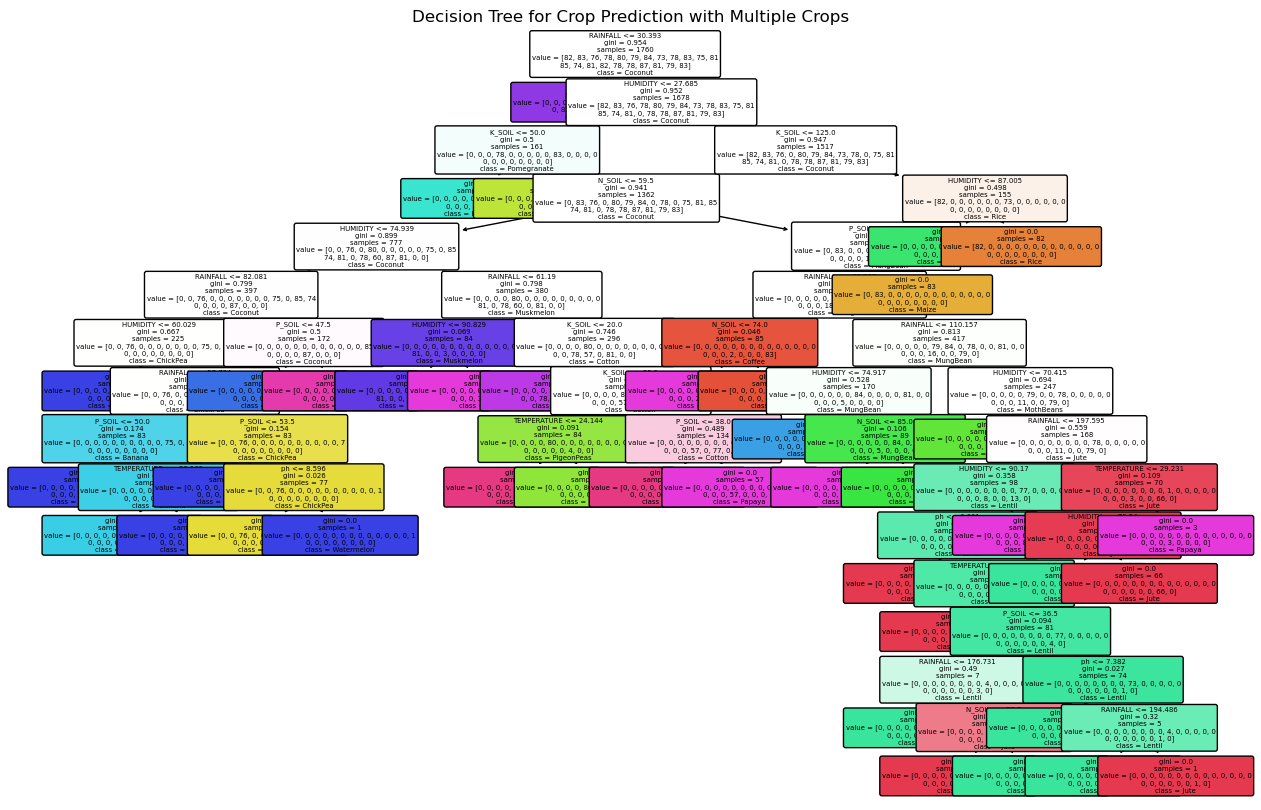

In [21]:
from sklearn import tree

feature_names = list(X.columns)
# List of unique crops present in the dataset
crop_names = ['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas', 'MothBeans',
              'MungBean', 'Blackgram', 'Lentil', 'Pomegranate', 'Banana', 'Mango',
              'Grapes', 'Watermelon', 'Muskmelon', 'Apple', 'Orange', 'Papaya',
              'Coconut', 'Cotton', 'Jute', 'Coffee']

# Plot the decision tree
plt.figure(figsize=(15, 10))

# Visualize the decision tree with all crop names
tree.plot_tree(clf, feature_names=feature_names, class_names=crop_names, filled=True, rounded=True, fontsize=5)

# Add a title
plt.title('Decision Tree for Crop Prediction with Multiple Crops')
plt.show()

### Random Forest

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score

# Features (X) and target (y)
X = df[['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL']]
y = df['CROP']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("precision: ",precision_score(y_test,y_pred,average='macro'))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest
Accuracy: 0.990909090909091
precision:  0.9931818181818183

Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        34
      Banana       1.00      1.00      1.00        26
   Blackgram       1.00      1.00      1.00        26
    ChickPea       1.00      1.00      1.00        34
     Coconut       1.00      1.00      1.00        33
      Coffee       1.00      1.00      1.00        30
      Cotton       1.00      1.00      1.00        28
      Grapes       1.00      1.00      1.00        23
        Jute       0.85      1.00      0.92        34
 KidneyBeans       1.00      1.00      1.00        36
      Lentil       1.00      1.00      1.00        22
       Maize       1.00      1.00      1.00        26
       Mango       1.00      1.00      1.00        32
   MothBeans       1.00      1.00      1.00        34
    MungBean       1.00      1.00      1.00        30
   Muskmelon       1.00      1.00     